In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 定义文件路径
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"

# 读取Excel文件中的origin工作表
try:
    df = pd.read_excel(file_path, sheet_name='origin')
    print("数据读取成功，原始数据形状：", df.shape)
except Exception as e:
    print(f"读取文件时出错: {e}")
    exit()

# 定义需要处理的连续型特征列表
continuous_features = [
    'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol',
    'glucose', 'insulin', 'sleep_hours', 'work_hours', 'daily_steps',
    'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'income'
]

# 检查特征是否都存在于数据中
missing_features = [feat for feat in continuous_features if feat not in df.columns]
if missing_features:
    print(f"警告：数据中缺少以下特征: {missing_features}")
    # 只保留存在的特征
    continuous_features = [feat for feat in continuous_features if feat in df.columns]
    if not continuous_features:
        print("没有可处理的特征，程序退出")
        exit()

# 提取需要处理的特征数据
data = df[continuous_features].copy()

# 检查并处理缺失值
print("\n缺失值统计:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# 填充缺失值（使用列的均值）
data = data.fillna(data.mean())

# 标准化处理
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 将标准化后的数据转换为DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=continuous_features)

# 打印标准化后的前5行数据，查看处理结果
print("\n标准化后的前5行数据:")
print(data_scaled_df.head())

# 计算相关性（使用皮尔逊相关系数）
correlation_matrix = data_scaled_df.corr(method='pearson')

# 打印相关性矩阵
print("\n特征间的相关性矩阵:")
print(correlation_matrix)

# 可以选择打印相关性较强的特征对（绝对值大于0.5的）
print("\n相关性较强的特征对（|r| > 0.5）:")
strong_correlations = []
for i in range(len(continuous_features)):
    for j in range(i+1, len(continuous_features)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            strong_correlations.append((
                continuous_features[i],
                continuous_features[j],
                round(corr, 4)
            ))

# 按相关性绝对值排序
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for corr_pair in strong_correlations:
    print(f"{corr_pair[0]} 与 {corr_pair[1]}: {corr_pair[2]}")


数据读取成功，原始数据形状： (13245, 45)

缺失值统计:
Series([], dtype: int64)

标准化后的前5行数据:
        bmi  waist_size  blood_pressure  heart_rate  cholesterol   glucose  \
0  1.052573   -1.089741       -0.535699   -0.807060    -0.337700  1.953009   
1  1.130938   -0.973061        0.708790    0.922871     0.924748 -0.581677   
2  0.305443   -0.311178        0.518101    0.128046    -0.679496  0.575500   
3 -0.374604   -1.519955       -0.778455    2.035233     1.340566 -0.011265   
4 -0.797504   -0.786358        0.549090   -0.656015     0.373149  0.685818   

    insulin  sleep_hours  work_hours  daily_steps  calorie_intake  \
0 -1.075518     0.607150   -0.560377    -0.839360       -0.482024   
1  0.885453     0.818443   -1.366139     0.885101       -0.174991   
2  3.217386    -0.481150   -1.651583     1.248953       -0.339706   
3 -0.423360    -2.054639    0.198033    -0.377252       -0.505390   
4 -1.331548    -0.283489   -1.270495    -1.062987       -0.226284   

   sugar_intake  water_intake  screen_time 

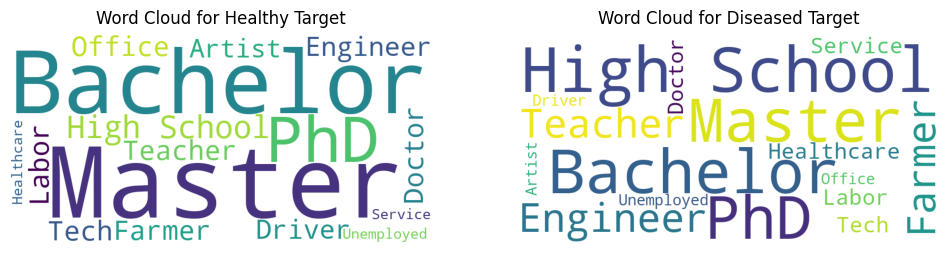

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 文件路径
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
# 读取 Excel 文件中的 origin 工作表
df = pd.read_excel(file_path, sheet_name='origin')

# 要分析的列
columns_to_analyze = ['education_level', 'job_type', 'occupation']
# 目标列
target_column = 'target'

# 分别获取 target 为 healthy 和 diseased 的数据
healthy_data = df[df[target_column] == 'healthy']
diseased_data = df[df[target_column] == 'diseased']

# 定义函数，用于统计词汇频率并生成词云
def generate_wordcloud(data, columns):
    # 存储词汇及其出现次数
    word_freq = {}
    for col in columns:
        # 遍历当前列的每个元素
        for word in data[col].astype(str):
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
    # 生成词云，通过传入字典形式的词频数据
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    return wordcloud

# 生成 healthy 和 diseased 对应的词云
healthy_wordcloud = generate_wordcloud(healthy_data, columns_to_analyze)
diseased_wordcloud = generate_wordcloud(diseased_data, columns_to_analyze)

# 绘制词云图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(healthy_wordcloud)
plt.title('Word Cloud for Healthy Target')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(diseased_wordcloud)
plt.title('Word Cloud for Diseased Target')
plt.axis('off')

plt.show()

数据读取成功


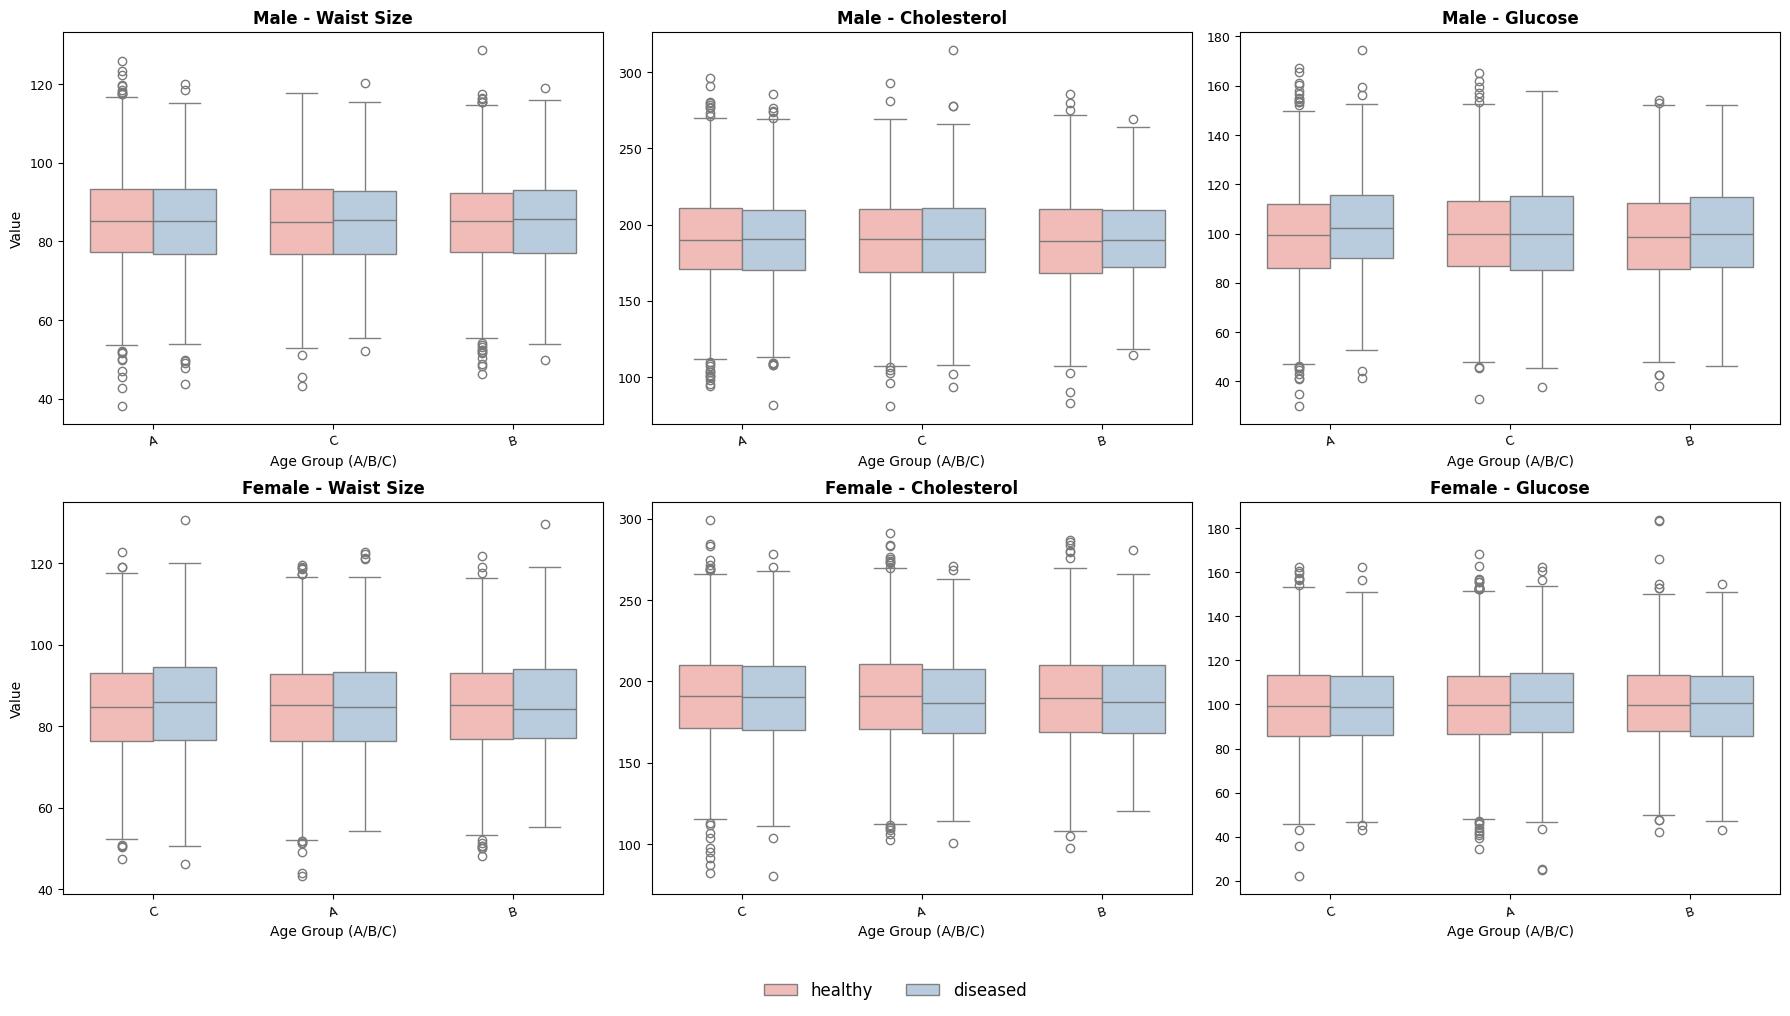

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 文件路径
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"

# 读取Excel数据
try:
    df = pd.read_excel(file_path, sheet_name='origin')
    print("数据读取成功")
except Exception as e:
    print(f"读取文件错误: {e}")
    exit()

# 验证所需列是否存在
required_columns = ['age_group', 'gender', 'target', 'waist_size', 'cholesterol', 'glucose']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"错误：缺少必要的列 - {missing_columns}")
    exit()

# 定义要绘制的指标及其名称
indicators = {
    'waist_size': 'Waist Size',
    'cholesterol': 'Cholesterol',
    'glucose': 'Glucose'
}

# 设置绘图风格
plt.style.use('default')
sns.set_palette('Pastel1')

# 创建六宫格布局（2行×3列）
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)

# 存储图例引用，确保只显示一个
handles, labels = None, None

# 遍历性别和指标绘图
for row_idx, gender in enumerate(['male', 'female']):
    for col_idx, (indicator, indicator_name) in enumerate(indicators.items()):
        # 获取当前子图位置
        ax = fig.add_subplot(gs[row_idx, col_idx])

        # 筛选当前性别和指标的数据
        gender_data = df[df['gender'] == gender]

        # 绘制箱线图
        sns.boxplot(
            x='age_group',
            y=indicator,
            hue='target',
            data=gender_data,
            ax=ax,
            palette='Pastel1',
            width=0.7,
            #showmeans=True,  # 显示均值
            #medianprops={'color': 'none'},  # 隐藏中位线
            boxprops={'edgecolor': 'gray'},  # 箱体边框颜色
            whiskerprops={'color': 'gray'},  # 须线颜色
            capprops={'color': 'gray'}  # 须线帽颜色
        )

        # 设置标题和标签
        ax.set_title(f'{gender.capitalize()} - {indicator_name}', fontweight='bold', fontsize=12)
        ax.set_xlabel('Age Group (A/B/C)', fontsize=10)

        # 只在第一列显示y轴标签
        if col_idx == 0:
            ax.set_ylabel('Value', fontsize=10)
        else:
            ax.set_ylabel('')

        # 旋转x轴标签
        ax.tick_params(axis='x', rotation=15, labelsize=9)
        ax.tick_params(axis='y', labelsize=9)

        # 获取图例引用（只需要一次）
        if handles is None and labels is None:
            handles, labels = ax.get_legend_handles_labels()

        # 移除子图中的图例
        ax.get_legend().remove()

# 添加全局图例
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12,
           bbox_to_anchor=(0.5, -0.02), frameon=False)

# 调整布局
plt.tight_layout()
fig.subplots_adjust(bottom=0.1)  # 为底部图例留出空间

# 显示图形
plt.show()


In [8]:
print("yes")

yes


数据读取成功，原始数据形状: (13245, 4)


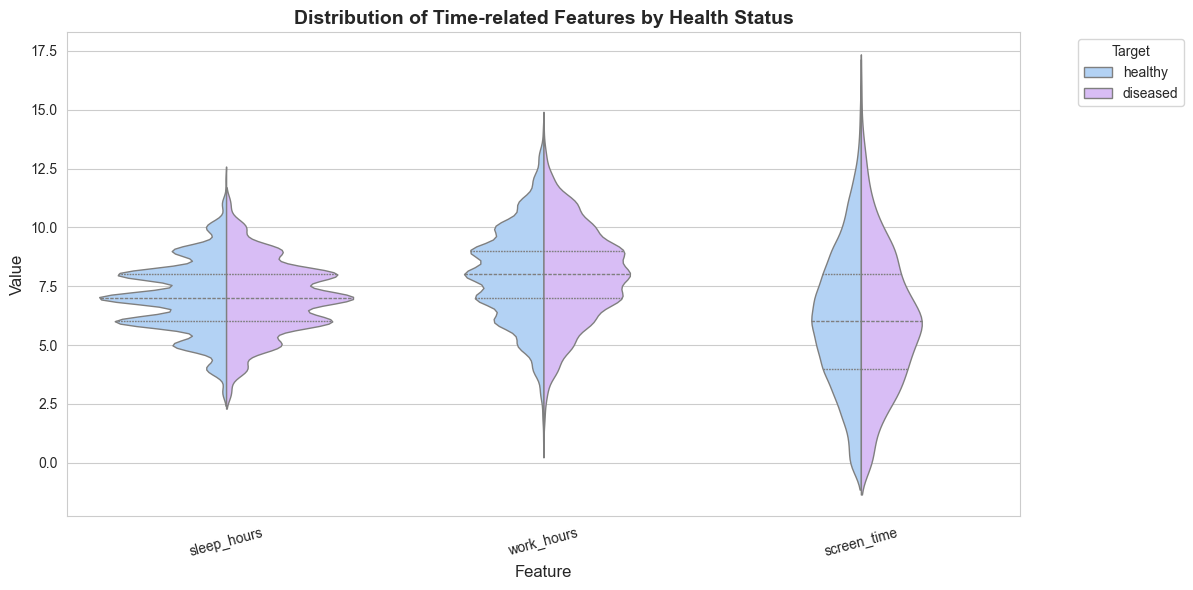

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 文件路径
file_path = r"D:\111PythonLearning\data\hour.csv"

# 读取 CSV 数据
try:
    df = pd.read_csv(file_path)
    print("数据读取成功，原始数据形状:", df.shape)
except Exception as e:
    print(f"读取文件错误: {e}")
    exit()

# 验证必要列存在
required_columns = ['target', 'sleep_hours', 'work_hours', 'screen_time']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"错误：缺少必要的列 - {missing_columns}")
    exit()
sampled_dfs = []
for target in ['healthy', 'diseased']:
    target_df = df[df['target'] == target]
    sampled_df = target_df.sample(frac=0.4, random_state=42)  # 按比例抽样
    sampled_dfs.append(sampled_df)
sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# 重塑数据为长格式（方便 seaborn 绘图）
melt_df = pd.melt(
    sampled_df,
    id_vars=['target'],
    value_vars=['sleep_hours', 'work_hours', 'screen_time'],
    var_name='feature',
    value_name='value'
)

# 设置绘图风格
sns.set_style("whitegrid")
sns.set_palette("Set2")

# 绘制小提琴图
plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    x='feature',          # 横坐标为特征名称（sleep_hours等）
    y='value',            # 纵坐标为特征值
    hue='target',         # 按 target 分组
    data=melt_df,
    split=True,           # 同一 x 下，不同 target 分开展示
    inner='quartile',     # 显示四分位数
    linewidth=1,
    palette=['#a8d1ff', '#d8b4fe']  # 健康、疾病分组颜色
)

# 图形美化
plt.title('Distribution of Time-related Features by Health Status', fontsize=14, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=15)  # 旋转 x 轴标签，避免重叠

# 调整图例位置
plt.legend(title='Target', loc='upper right', bbox_to_anchor=(1.18, 1))

plt.tight_layout()
plt.show()

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

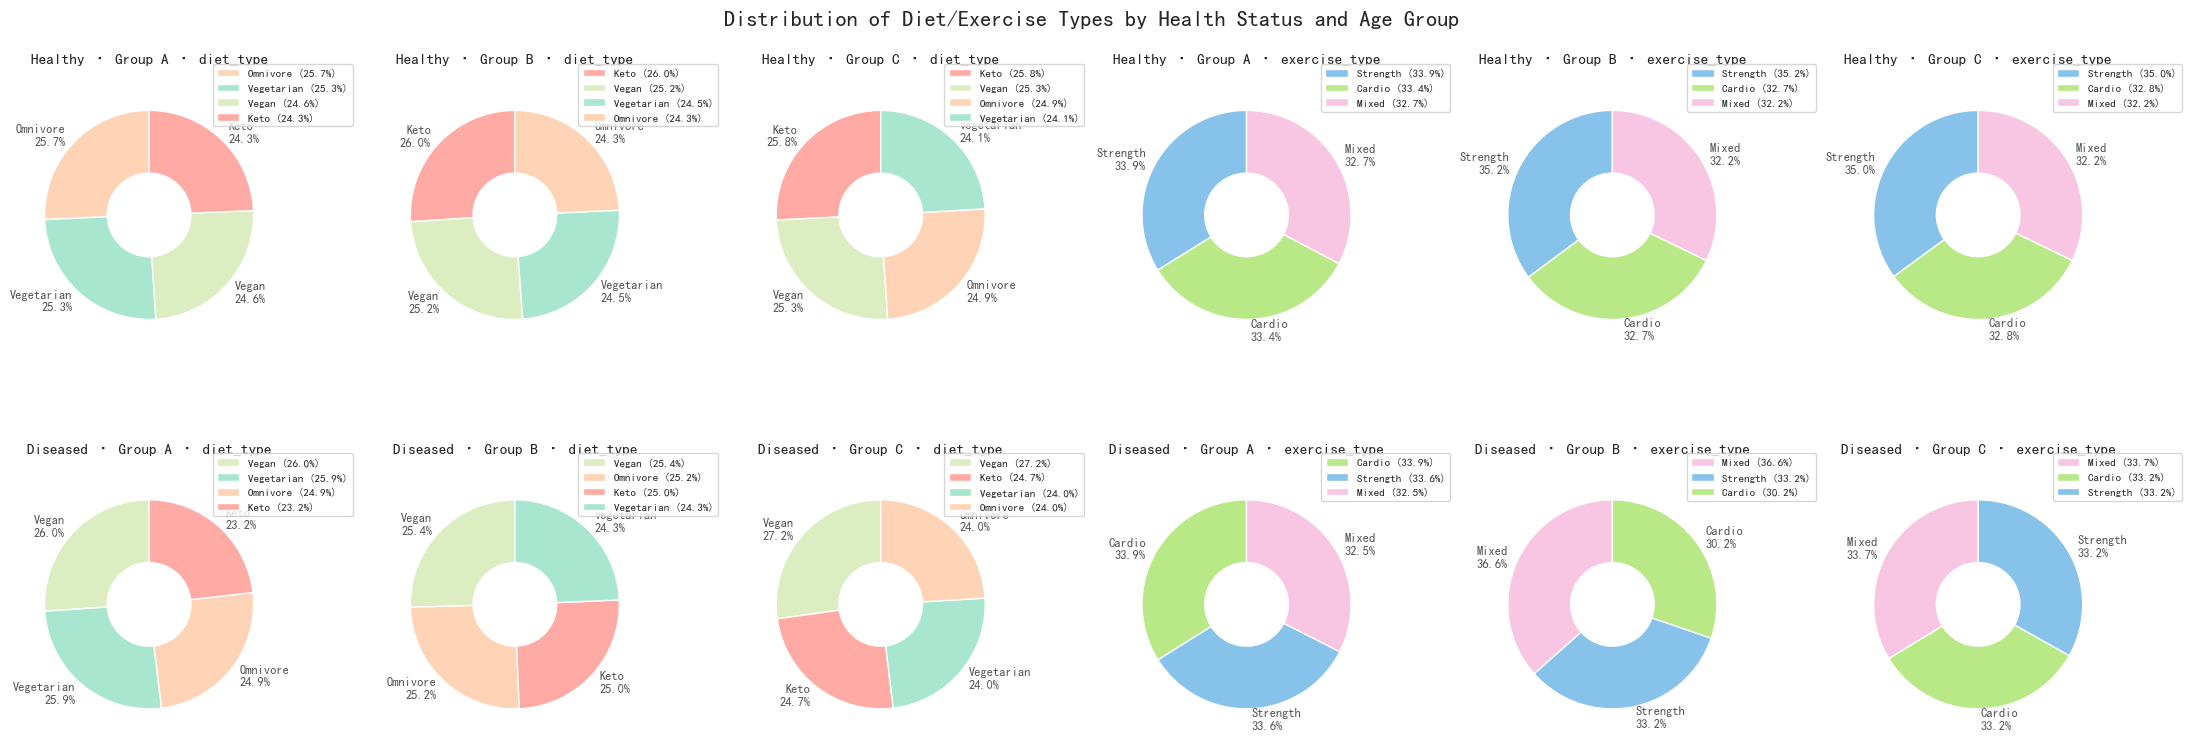

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 定义柔和配色（备用，此处主要用下面的固定颜色）
soft_palette = sns.color_palette("pastel")

# diet_type四种固定颜色
diet_colors = {
    'Vegetarian': '#a8e6cf',    # 浅薄荷绿
    'Keto': '#ffaaa5',          # 浅珊瑚色
    'Vegan': '#dcedc1',         # 浅草绿色
    'Omnivore': '#ffd3b6'       # 浅橙色
}

# exercise_type三种固定颜色
exercise_colors = {
    'Cardio': '#b8e986',        # 浅绿色
    'Strength': '#86c2e9',      # 浅蓝色
    'Mixed': '#f8c5e3'          # 浅粉色
}

# 读取数据
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
df = pd.read_excel(file_path, sheet_name='origin')

# 验证必要列是否存在
required_cols = ['target', 'age_group', 'diet_type', 'exercise_type']
missing_cols = set(required_cols) - set(df.columns)
if missing_cols:
    raise ValueError(f"数据缺少列：{missing_cols}")

# 分析维度定义
targets = ['healthy', 'diseased']       # 健康状态
age_groups = ['A', 'B', 'C']           # 年龄组
features = ['diet_type', 'exercise_type']  # 分析特征

# 创建 2 行×6 列布局（12 张子图）
fig, axes = plt.subplots(2, 6, figsize=(22, 8), dpi=100)
axes = axes.flatten()  # 转为一维数组方便索引

# 遍历生成所有子图
for subplot_idx, target in enumerate(targets):
    for feature in features:
        for age_group in age_groups:
            # 计算子图索引
            ax_idx = subplot_idx * 6 + (features.index(feature) * 3 + age_groups.index(age_group))
            ax = axes[ax_idx]

            # 筛选数据（过滤空值）
            mask = (df['target'] == target) & (df['age_group'] == age_group)
            filtered = df[mask][feature].dropna()  # 丢弃空值

            if filtered.empty:
                ax.axis('off')  # 空数据隐藏坐标轴
                continue

            # 计算类别占比（百分比）
            value_counts = filtered.value_counts(normalize=True) * 100

            # 构建饼图标签（使用换行符 \n，仅用于饼图显示）
            pie_labels = [f"{label}\n{round(percent, 1)}%" for label, percent in value_counts.items()]

            # 根据特征选择对应的颜色字典，并按类别顺序提取颜色
            if feature == 'diet_type':
                # 从diet_colors中按当前类别顺序取色
                colors = [diet_colors[label] for label in value_counts.index]
            else:  # exercise_type
                # 从exercise_colors中按当前类别顺序取色
                colors = [exercise_colors[label] for label in value_counts.index]

            # 绘制饼图（使用特征对应的固定颜色）
            wedges, texts = ax.pie(
                value_counts,
                labels=pie_labels,
                startangle=90,
                colors=colors,  # 此处使用上面提取的固定颜色
                wedgeprops={"width": 0.6},  # 紧凑环形
                textprops={"fontsize": 9, "color": "#555555"}  # 标签样式
            )

            # 设置标题（纯英文，避免字体问题）
            ax.set_title(
                f"{target.capitalize()} · Group {age_group} · {feature}",
                fontsize=11,
                pad=15
            )

            # 构建图例标签
            legend_labels = [f"{label} ({round(percent, 1)}%)" for label, percent in value_counts.items()]

            # 添加图例
            ax.legend(
                wedges,
                legend_labels,
                loc="upper right",
                bbox_to_anchor=(1.3, 1.1),
                fontsize=8
            )

# 全局布局调整
plt.tight_layout()
plt.subplots_adjust(
    top=0.88,    # 顶部间距
    wspace=0.4,  # 列间距
    hspace=0.3   # 行间距
)
plt.suptitle(
    "Distribution of Diet/Exercise Types by Health Status and Age Group",
    fontsize=16,
    y=0.95
)

plt.show()

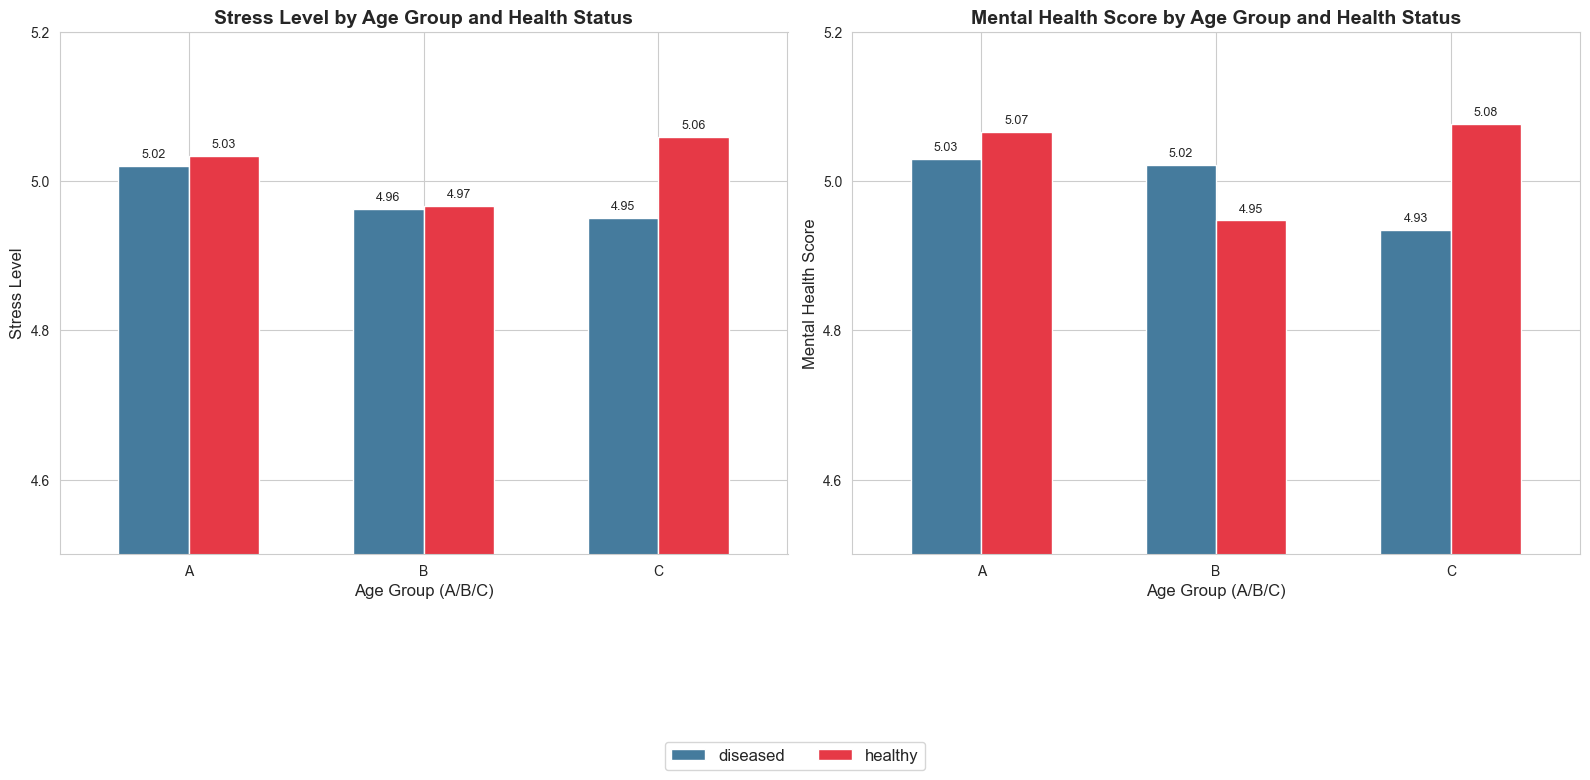

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator  # 用于细化坐标轴刻度

file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='origin')
except Exception as e:
    print(f"文件读取失败：{e}")
    exit()

# 校验必需列是否存在
required_columns = ['age_group', 'target', 'stress_level', 'mental_health_score']
missing = [col for col in required_columns if col not in df.columns]
if missing:
    print(f"错误：缺少列 {missing}")
    exit()

# 按年龄组（A/B/C）和健康状态（healthy/diseased）分组，计算指标均值
grouped_stress = df.groupby(['age_group', 'target'])['stress_level'].mean().unstack()
grouped_mental = df.groupby(['age_group', 'target'])['mental_health_score'].mean().unstack()

sns.set_style("whitegrid")  # 白色网格背景，更清爽
# 固定配色（diseased=深蓝色，healthy=暖橙色，对比强烈）
COLORS = {'diseased': '#457B9D', 'healthy': '#E63946'}

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)  # 两张图独立设置y轴，避免范围被压缩

ax_stress = axes[0]
grouped_stress.plot(
    kind='bar',
    ax=ax_stress,
    width=0.6,  # 柱子宽度，平衡间距和视觉效果
    color=[COLORS['diseased'], COLORS['healthy']]
)
ax_stress.set_title('Stress Level by Age Group and Health Status', fontsize=14, fontweight='bold')
ax_stress.set_xlabel('Age Group (A/B/C)', fontsize=12)
ax_stress.set_ylabel('Stress Level', fontsize=12)
ax_stress.tick_params(axis='x', rotation=0, labelsize=10)  # x轴标签不旋转，更清晰

# 细化y轴刻度：每0.2一个刻度，突出细微差异
ax_stress.yaxis.set_major_locator(MultipleLocator(0.2))
# 调整y轴范围（根据实际数据，假设均值在4.5~5.2之间，可自行修改）
ax_stress.set_ylim(bottom=4.5, top=5.2)

# 添加数据标签（柱子顶部显示具体值，保留2位小数）
for p in ax_stress.patches:
    height = p.get_height()
    ax_stress.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width()/2, height),
        xytext=(0, 4),  # 标签在柱子上方4像素
        textcoords="offset points",
        ha='center', va='bottom', fontsize=9
    )

ax_mental = axes[1]
grouped_mental.plot(
    kind='bar',
    ax=ax_mental,
    width=0.6,
    color=[COLORS['diseased'], COLORS['healthy']]
)
ax_mental.set_title('Mental Health Score by Age Group and Health Status', fontsize=14, fontweight='bold')
ax_mental.set_xlabel('Age Group (A/B/C)', fontsize=12)
ax_mental.set_ylabel('Mental Health Score', fontsize=12)
ax_mental.tick_params(axis='x', rotation=0, labelsize=10)

# 细化y轴刻度（同stress_level的逻辑）
ax_mental.yaxis.set_major_locator(MultipleLocator(0.2))
ax_mental.set_ylim(bottom=4.5, top=5.2)  # 同步范围，方便对比

# 添加数据标签
for p in ax_mental.patches:
    height = p.get_height()
    ax_mental.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width()/2, height),
        xytext=(0, 4),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=9
    )

handles, labels = ax_stress.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',  # 底部中央
    ncol=2, fontsize=12,
    bbox_to_anchor=(0.5, -0.12)  # 调整位置，避免遮挡
)

# 移除子图内的图例（统一用底部图例）
ax_stress.get_legend().remove()
ax_mental.get_legend().remove()

plt.tight_layout()  # 自动调整间距
plt.subplots_adjust(bottom=0.2)  # 给底部图例留空间

plt.show()

这个不太成功，后面洗数据试了一下……效果好了一些但还是不太够

数据读取成功，形状：(13245, 45)
前5行数据：
   survey_code gender age_group        bmi  waist_size  blood_pressure  \
0           11   male         A  30.731407   71.862592      111.870636   
1           13   male         A  31.200626   73.274294      130.436277   
2           15   male         A  26.257896   81.282398      127.591522   
3           25   male         C  22.186047   66.657447      108.249127   
4           28   male         A  19.653889   75.533214      128.053824   

   heart_rate  cholesterol     glucose    insulin  ...  pet_owner  \
0   66.922530   179.722343  138.632213   9.593523  ...        Yes   
1   84.101594   217.806217   88.310330  19.461592  ...        Yes   
2   76.208592   169.411486  111.284125  31.196429  ...         No   
3   95.147899   230.350060   99.634905  12.875334  ...         No   
4   68.422487   201.166287  113.474288   8.305118  ...        Yes   

   daily_supplement_dosage    target  Unnamed: 38  Unnamed: 39  Unnamed: 40  \
0                 8.682837   hea

D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\utils\_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\pipeline.py", line 788, in predict
    Xt = transform.transform(Xt)
  File "D:\APP\anaconda\envs\pytorch3\lib\site-package


5折交叉验证准确率：nan ± nan

测试集分类报告：
              precision    recall  f1-score   support

    diseased       0.00      0.00      0.00      1155
     healthy       0.71      1.00      0.83      2819

    accuracy                           0.71      3974
   macro avg       0.35      0.50      0.41      3974
weighted avg       0.50      0.71      0.59      3974

混淆矩阵：
[[   0 1155]
 [   0 2819]]


C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missi

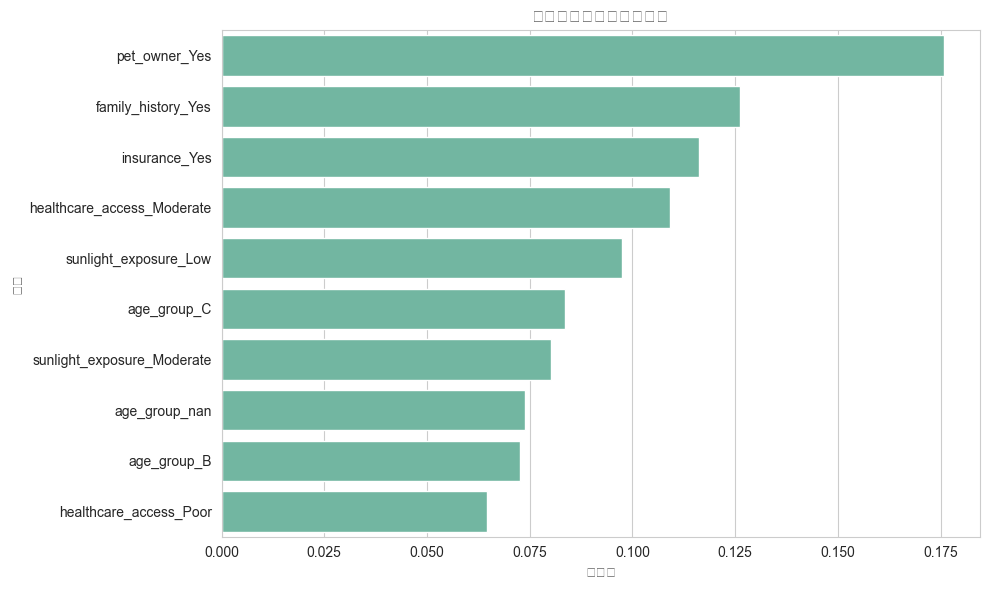


高风险特征组合（患病比例高）：
    age_group healthcare_access insurance sunlight_exposure family_history  \
167         C              Good       Yes          Moderate            Yes   
123         B              Poor        No              High            Yes   
146         C              Good        No              High            Yes   
193         C              Poor        No              High             No   
144         C              Good        No              High             No   
43          A          Moderate       Yes               Low            Yes   
152         C              Good        No          Moderate             No   
166         C              Good       Yes          Moderate            Yes   
39          A          Moderate       Yes              High            Yes   
68          A              Poor       Yes          Moderate             No   

    pet_owner  diseased_ratio  样本量  
167       Yes        0.421875   64  
123       Yes        0.418182   55  
146        No

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

# ---------------------- 1. 数据读取与基本查看 ----------------------
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='origin')
    print(f"数据读取成功，形状：{df.shape}")
    print("前5行数据：")
    print(df.head())
except Exception as e:
    print(f"读取文件错误：{e}")
    exit()

# 定义特征列和目标列
feature_cols = ['age_group', 'healthcare_access', 'insurance', 'sunlight_exposure', 'family_history', 'pet_owner']
target_col = 'target'

# 检查必要列是否存在
missing_cols = [col for col in feature_cols + [target_col] if col not in df.columns]
if missing_cols:
    print(f"错误：缺少必要列 {missing_cols}")
    exit()

# 查看目标变量分布（判断是否平衡）
print("\n目标变量分布：")
print(df[target_col].value_counts(normalize=True))


# ---------------------- 2. 数据预处理（分类特征编码） ----------------------
# 所有特征都是分类特征，需要进行独热编码（One-Hot Encoding）
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), feature_cols)  # drop='first'避免多重共线性
    ])

# 划分训练集和测试集（7:3）
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify保证目标变量分布一致
)


# ---------------------- 3. 构建随机森林模型 ----------------------
# 管道：预处理+模型（避免数据泄露）
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,  # 100棵树（平衡性能和速度）
        max_depth=5,       # 限制树深度，避免过拟合
        min_samples_split=10,  # 至少10个样本才分裂
        random_state=42,
        n_jobs=-1  # 并行计算，加速训练
    ))
])

# 训练模型
model.fit(X_train, y_train)

# 交叉验证评估（更稳健）
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"\n5折交叉验证准确率：{cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 测试集评估
y_pred = model.predict(X_test)
print("\n测试集分类报告：")
print(classification_report(y_test, y_pred))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred))


# ---------------------- 4. 特征重要性分析 ----------------------
# 获取编码后的特征名（用于解读）
encoder = preprocessor.named_transformers_['cat']
encoded_feature_names = list(encoder.get_feature_names_out(feature_cols))

# 计算特征重要性（随机森林自带）
rf = model.named_steps['classifier']
feature_importance = pd.DataFrame({
    '特征': encoded_feature_names,
    '重要性': rf.feature_importances_
}).sort_values(by='重要性', ascending=False)

# 可视化前10重要特征
plt.figure(figsize=(10, 6))
sns.barplot(x='重要性', y='特征', data=feature_importance.head(10))
plt.title('特征重要性（随机森林）', fontsize=12)
plt.tight_layout()
plt.show()


# ---------------------- 5. 挖掘规律（特征组合分析） ----------------------
def find_rules(df, feature_cols, target_col, top_n=10):
    """挖掘特征组合与目标变量的关联规则"""
    # 按特征组合分组，计算患病比例
    grouped = df.groupby(feature_cols)[target_col].apply(
        lambda x: (x == 'diseased').mean()  # 患病比例
    ).reset_index(name='diseased_ratio')

    # 计算每组样本量
    count_df = df.groupby(feature_cols).size().reset_index(name='样本量')
    rules = pd.merge(grouped, count_df, on=feature_cols)

    # 筛选样本量足够的组（至少50个样本，保证可靠性）
    rules = rules[rules['样本量'] >= 50]

    # 分别取患病比例最高和最低的规则
    high_risk = rules.sort_values(by='diseased_ratio', ascending=False).head(top_n)
    low_risk = rules.sort_values(by='diseased_ratio', ascending=True).head(top_n)

    print("\n高风险特征组合（患病比例高）：")
    print(high_risk)
    print("\n低风险特征组合（患病比例低）：")
    print(low_risk)
    return high_risk, low_risk

# 挖掘规则
high_risk_rules, low_risk_rules = find_rules(df, feature_cols, target_col)


🔍 缺失值统计：
Series([], dtype: int64)
🧹 删除缺失值后，形状：(10127, 7)

🎯 目标变量分布：
target
healthy     0.619927
diseased    0.380073
Name: proportion, dtype: float64

🔢 5折交叉验证F1（加权）：0.5109 ± 0.0071

📝 测试集分类报告：
              precision    recall  f1-score   support

    diseased       0.39      0.45      0.42      1155
     healthy       0.63      0.57      0.59      1884

    accuracy                           0.52      3039
   macro avg       0.51      0.51      0.51      3039
weighted avg       0.54      0.52      0.53      3039

🔢 混淆矩阵：
[[ 518  637]
 [ 817 1067]]


C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16})

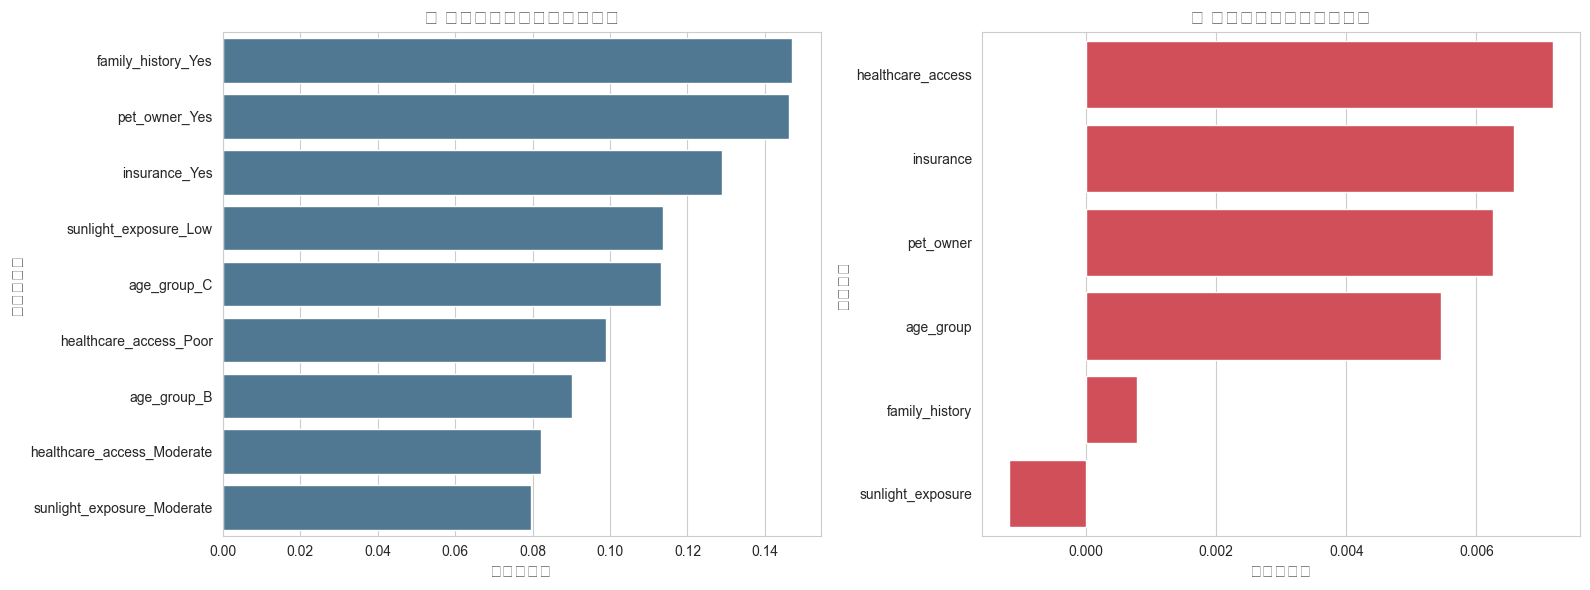


🔥 高风险特征组合（患病比例高）：
    age_group healthcare_access insurance sunlight_exposure family_history  \
66          A              Poor       Yes               Low            Yes   
167         C              Good       Yes          Moderate            Yes   
29          A          Moderate        No               Low             No   
61          A              Poor       Yes              High             No   
68          A              Poor       Yes          Moderate             No   
69          A              Poor       Yes          Moderate             No   
43          A          Moderate       Yes               Low            Yes   
17          A              Good       Yes               Low             No   
166         C              Good       Yes          Moderate            Yes   
48          A              Poor        No              High             No   

    pet_owner  diseased_ratio  样本量  
66         No        0.517241   58  
167       Yes        0.509091   55  
29        Y

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

# ---------------------- 1. 数据读取与清洗 ----------------------
file_path = r"D:\111PythonLearning\data\try_class.csv"

df = pd.read_csv(file_path)

# 检查缺失值并处理（简单删除，可根据实际调整）
print("\n🔍 缺失值统计：")
missing = df.isnull().sum()
print(missing[missing > 0])
df.dropna(inplace=True)
print(f"🧹 删除缺失值后，形状：{df.shape}")

# 定义特征和目标列（自动识别，假设target为最后一列或显式命名）
target_col = 'target'  # 需确保数据中存在此列
feature_cols = [col for col in df.columns if col != target_col]

if not feature_cols:
    print("❌ 无有效特征列！")
    exit()

# 查看目标变量分布（判断类别平衡度）
print("\n🎯 目标变量分布：")
print(df[target_col].value_counts(normalize=True))


# ---------------------- 2. 数据预处理（分类特征编码） ----------------------
# 所有特征均为分类变量，使用独热编码
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_encoder', OneHotEncoder(drop='first', sparse_output=False), feature_cols)
    ]
)


# ---------------------- 3. 模型构建（随机森林+类别平衡） ----------------------
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,      # 增加树数量提升学习能力
        max_depth=6,          # 限制深度避免过拟合
        min_samples_split=15, # 减少小分支
        class_weight='balanced',  # 关键：平衡类别权重
        random_state=42,
        n_jobs=-1             # 多核加速
    ))
])


# ---------------------- 4. 模型评估（交叉验证+测试集） ----------------------
# 分层划分训练集&测试集
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5折交叉验证（用F1加权，更适合不平衡数据）
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(f"\n🔢 5折交叉验证F1（加权）：{cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 训练并预测
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 测试集报告
print("\n📝 测试集分类报告：")
print(classification_report(y_test, y_pred))
print("🔢 混淆矩阵：")
print(confusion_matrix(y_test, y_pred))


# ---------------------- 5. 特征重要性分析（修正核心错误！） ----------------------
# ========== 方法1：随机森林内置重要性（编码后特征） ==========
rf = model.named_steps['classifier']
encoder = preprocessor.named_transformers_['cat_encoder']
encoded_features = encoder.get_feature_names_out(feature_cols)  # 编码后的特征名（如 age_group_A）

importances = pd.DataFrame({
    '特征': encoded_features,  # 编码后的特征（细粒度）
    '内置重要性': rf.feature_importances_
}).sort_values('内置重要性', ascending=False)

# ========== 方法2：置换重要性（原始特征，粗粒度） ==========
result = permutation_importance(
    model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1
)
perm_importances = pd.DataFrame({
    '特征': feature_cols,  # 原始特征名（如 age_group）
    '置换重要性': result.importances_mean
}).sort_values('置换重要性', ascending=False)


# ---------------------- 6. 可视化（分开展示两种重要性） ----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 子图1：内置重要性（编码后特征，细粒度）
sns.barplot(
    x='内置重要性', y='特征', data=importances.head(10),
    ax=axes[0], color='#457B9D'
)
axes[0].set_title('🔍 内置重要性（编码后特征）', fontsize=14)
axes[0].set_xlabel('重要性得分', fontsize=12)
axes[0].set_ylabel('编码后特征', fontsize=12)

# 子图2：置换重要性（原始特征，粗粒度）
sns.barplot(
    x='置换重要性', y='特征', data=perm_importances.head(10),
    ax=axes[1], color='#E63946'
)
axes[1].set_title('🔍 置换重要性（原始特征）', fontsize=14)
axes[1].set_xlabel('重要性得分', fontsize=12)
axes[1].set_ylabel('原始特征', fontsize=12)

plt.tight_layout()
plt.show()


# ---------------------- 7. 挖掘特征组合规律 ----------------------
def extract_rules(df, feature_cols, target_col, min_samples=50):
    """提取高/低风险特征组合"""
    # 自动识别患病标签（假设二分类，取 minority class 为 diseased）
    if df[target_col].dtype == 'object':
        diseased = df[target_col].value_counts().idxmin()
    else:
        diseased = 1 if (df[target_col].mean() < 0.5) else 0

    # 分组计算患病比例
    grouped = df.groupby(feature_cols)[target_col].apply(
        lambda x: (x == diseased).mean()
    ).reset_index(name='diseased_ratio')

    # 样本量过滤
    count_df = df.groupby(feature_cols).size().reset_index(name='样本量')
    rules = pd.merge(grouped, count_df, on=feature_cols)
    rules = rules[rules['样本量'] >= min_samples]

    # 排序
    high_risk = rules.sort_values('diseased_ratio', ascending=False).head(10)
    low_risk = rules.sort_values('diseased_ratio', ascending=True).head(10)

    return high_risk, low_risk

high_risk, low_risk = extract_rules(df, feature_cols, target_col)
print("\n🔥 高风险特征组合（患病比例高）：")
print(high_risk)
print("\n❄️ 低风险特征组合（患病比例低）：")
print(low_risk)